# Computer Exercise #06  #

## Computer Exercise 6.1 (Decision Trees):

Common Imports

In [7]:
import numpy as np 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

Read the data in subdirectory ``data`` and save it as a pandas dataframe.

In [8]:
data_train = pd.read_csv('train.csv', dtype=int) # read train data
data_test = pd.read_csv('test.csv', dtype=int)   # read test data

### Questions ###
Examine the structure of this data set using the head method,

    data_train.head() ; data_test.head()
    
How many images are in the data set? What is the dimension of the feature vectors?
What are the features?


In [12]:
data_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
 data_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


> __Answers:__ There are 70,000 images the total dataset. The dimension of the feature vectors is 784. The features are the pixels that make up the image.

Prepare the data and put it into arrays ``X_train``, ``y_train`` and ``X_test``, ``y_test``.

In [14]:
X_train = data_train.drop('label', axis=1)
y_train = data_train['label']
X_test = data_test.drop('label', axis=1)
y_test = data_test['label']

Display the $i^{th}$ image in the dataset.

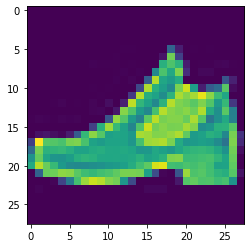

Label  9


In [18]:
i = 1                         #Put in a value for i
plt.imshow(X_train.iloc[i,:].values.reshape([28,28])) 
plt.show()
print('Label ',y_train[1])

## Decision Tree ##
Here is the basic call to learn a decision tree using the default values on the data ``[X_train,y_train]``. 

In [19]:
from sklearn.tree import DecisionTreeClassifier
Tree_model = DecisionTreeClassifier().fit(X_train,y_train)

In [26]:
print('Training Accuracy:', Tree_model.score(X_train, y_train))
print('Test Accuracy:',Tree_model.score(X_test, y_test))
print('Tree depth =', Tree_model.get_depth())
print('Number of Leaves = ', Tree_model.get_n_leaves())
#Tree_model.get_n_leaves()

Training Accuracy: 1.0
Test Accuracy: 0.7978
Tree depth = 48
Number of Leaves =  4998


### Questions ###

__i.__ With the default values, what is the structure of the tree? For example, are there any limits on the number of leaves, is the depth of the tree constrained, and so on.
> The tree is unconstrained. As max_leaf_nodes is not specified as a hyperparameter upon creating the classifier, there are no limits imposed on the number of leaves. Therefore, the maximum number of leaves are limitless. The minimum impurity decrease is 0.0 by default, therefore nodes split whenever there is any presence of impurity. Each of the classes have a weight of one on them. No pruning is performed on the classifier.

__ii.__ How many leaves are in the tree? What is the purity of the leaves? What is the maximum depth of the tree?
> There are 4998 leaves in the tree. Since the inimum impurity decrease is 0.0, all of the leaves are considered pure. The maximum depth of this tree is 48.

__iii.__ What is the training accuracy of your model on the training data? Discuss your results and any conclusions that you may have. Were you surprised by the results?
> The training accuracy is 100\%. This is not a surprise as this decision tree is unconstrained. A training error of 0 will always be the case for an unconstrained tree.

__iv.__ What is the accuracy of your decision tree on the test set? What does this tell you?
> The test accuracy is 79.78\%. This indicates that overfitting is taking place since the training error is 0% and the difference between the training and test accuracies are so large.

### Assignment: ###
Find the confusion matrix for your classifier on the test set. What does it tell you? Are there any classes that the classifier is have more trouble with than others?


In [23]:
#
from sklearn.metrics import confusion_matrix
#
confusion_matrix(Tree_model.predict(X_test),y_test)

array([[734,   5,  20,  35,  10,   1, 175,   0,  18,   0],
       [  7, 963,   4,  28,   5,   1,  10,   0,   2,   0],
       [ 17,   5, 677,  17, 152,   1,  95,   1,  14,   0],
       [ 45,  16,  17, 825,  49,   0,  37,   0,   9,   1],
       [  6,   5, 147,  47, 678,   2, 109,   0,  16,   1],
       [  3,   1,   3,   2,   1, 872,   1,  50,   7,  26],
       [172,   3, 120,  37,  98,   4, 558,   0,  20,   2],
       [  2,   0,   0,   0,   0,  64,   0, 867,   8,  65],
       [ 13,   2,  11,   9,   7,  20,  14,   6, 903,   4],
       [  1,   0,   1,   0,   0,  35,   1,  76,   3, 901]], dtype=int64)

_High numbers: row4col2: Coats vs Pullovers, row6col0 Shirts vs T-Shirts/Tops,  row6col2 Shirts vs Pullovers, row0col6  T-Shirt/Top vs Shirts, row5col7: Sandals vs Sneakers_

> __Answer:__ The confusion matrix is a table that describes the performance of a classifier on a set of test data where each row of the matrix represents the instances in an actual class while each column represents the instances in a predicted class. The higher the number in each row/column, the likelier that a predicted class will be confused for another. The classifier has trouble distinguishing between: Coats vs Pullovers, Shirts vs T-Shirts/Tops, Shirts vs Pullovers,  T-Shirt/Top, and Sandals vs Sneakers

### Cross-Validation ###

In [27]:
from sklearn.model_selection import cross_val_score
#
all_accuracies = cross_val_score(estimator=Tree_model, X=X_train, y=y_train, cv=5) 

#### Print accuracies

In [28]:
print(all_accuracies)
print('Mean Accuracy %8.2f' %(all_accuracies.mean()))

[0.79225    0.79125    0.79441667 0.79458333 0.79066667]
Mean Accuracy     0.79


### Assignment:
Decide how many folds that you would like to use, and use cross-validation to estimate the expected classification error of your decision tree. You probably want to use either five or ten folds. Explain the reason for your number of folds that you use. What is the advantage of choosing 10 folds versus 5? What do your results show? Is there any evidence that your tree is either underfitting or overfitting the data? Explain.

In [29]:
from sklearn.model_selection import cross_val_score
#
all_accuracies = cross_val_score(estimator=Tree_model, X=X_train, y=y_train, cv=10) #Number of Folds = 10

In [30]:
print(all_accuracies)
print('Mean Accuracy %8.2f' %(all_accuracies.mean()))

[0.794      0.79466667 0.798      0.79583333 0.79666667 0.79983333
 0.79683333 0.79433333 0.791      0.79133333]
Mean Accuracy     0.80


> __Answers:__
I have chosen 10 folds as I believe that a more accurate measurement of classification error is more important than the larger run time it takes to perform it. The advantage of choosing 10 folds versus 5 is that there is less bias towards overestimating the true expected error. There is however, a drawback as a higher number of folds results in a higher variance and longer run time. My results show that despite the training error being 0\%, there is a 20% accuracy in terms of cross validation. This means that the classifier is likely overfitting the data. 

### Assignment: ###
Design a decision tree with min_samples_leaf=5 and max_depth=12.

In [31]:
from sklearn.tree import DecisionTreeClassifier
Tree_model_2 = DecisionTreeClassifier(min_samples_leaf=5, max_depth=12).fit(X_train,y_train)

__i.__ What is the training error for your classifier.
> The training error is about 12.4017%.

In [34]:
print('Training Accuracy:', Tree_model_2.score(X_train, y_train))
print('Training Error:', 1-Tree_model_2.score(X_train, y_train))
print('Test Accuracy:',Tree_model_2.score(X_test, y_test))
print('Tree depth =', Tree_model_2.get_depth())
print('Number of Leaves = ', Tree_model_2.get_n_leaves())

Training Accuracy: 0.8759833333333333
Training Error: 0.12401666666666666
Test Accuracy: 0.8199
Tree depth = 12
Number of Leaves =  906


__ii.__ Estimate the expected error, compare your results to the tree that you designed in
part (a), and discuss your results.
> According to cross validation, the expected error is about 18%. This is superior to the classifier from part (a) in a number of ways. First, there is no evidence of overfitting the this time as the training accuracy is not 0 as in the previous classifier. Also, there is only a percentage difference of about 5% between the training accuracy and the expected accuracy of the new classifier.

In [35]:
from sklearn.model_selection import cross_val_score
#
all_accuracies = cross_val_score(estimator=Tree_model_2, X=X_train, y=y_train, cv=10) #Number of Folds = 10

print(all_accuracies)
print('Mean Accuracy %8.2f' %(all_accuracies.mean()))

[0.819      0.81116667 0.82066667 0.816      0.81583333 0.81566667
 0.82133333 0.82083333 0.81416667 0.80833333]
Mean Accuracy     0.82


__iii.__ Find the confusion matrix for your classifier. Discuss what you find. Are there any
pairs of classes that seem to be confused more often than others? Which ones? Does
it make sense?
>There are still instances in which multiple pairs of classes are confused more than others these pairs are: T-Shirt/Top & Shirt, Pullover & Coat, Coat & Trouser, Shirt & Pullover, and Shirt & Coat. With the exception of maybe coat & trouser, it is understandable where these confusions come from. Although perhaps the classifier has trouble differentiating between trousers and coats that have a split towrds the bottom. Regardless of why, I would say that they make sense. 

In [36]:
#
from sklearn.metrics import confusion_matrix
#
confusion_matrix(Tree_model_2.predict(X_test),y_test)

array([[806,   9,  14,  54,   5,   1, 199,   0,  15,   2],
       [  3, 958,   5,  13,   1,   1,   4,   0,   2,   0],
       [ 19,   2, 723,  16, 108,   0, 111,   0,  16,   1],
       [ 32,  19,  10, 843,  49,   1,  34,   0,   5,   1],
       [ 12,   5, 153,  44, 765,   0, 114,   0,  15,   0],
       [  3,   0,   2,   2,   1, 875,   2,  42,   8,  25],
       [113,   5,  86,  26,  67,   3, 527,   0,  31,   3],
       [  1,   0,   0,   0,   0,  60,   0, 909,   7,  71],
       [ 11,   2,   6,   2,   4,  21,   9,   3, 900,   4],
       [  0,   0,   1,   0,   0,  38,   0,  46,   1, 893]], dtype=int64)

### Grid Search ###
Here is an example of a grid search. You will need to modify the calls for the type of grid search that you would like to perfom.

### Assignment: ###
Use a grid search to find the best parameters for a decision tree classifier on the data set
X_train, y_train. Note: the numbers given in the example above were for illustration
purposes only - you should determine what the best values to use would be. Determine
which parameters to perform a grid search on along with the values to be evaluated.
Report the best set of parameter values and the accuracy of the classifier. Note: If your
grid search is taking too long, you may consider reducing the size of the data set.

> See output below for reported values 

In [40]:
from sklearn.model_selection import GridSearchCV
grid_param = { 'min_samples_leaf':[10, 20, 30, 40], 'max_depth':[5, 10, 15, 20], #I removed 20 after a previous run rendered it unnecesary 
              'criterion': ['gini', 'entropy'], 'min_samples_split':[2, 5, 10], 'min_impurity_decrease':[0, 0.5, 1.0]}
gd_sr = GridSearchCV(estimator = Tree_model, param_grid=grid_param, scoring='accuracy', cv=5, n_jobs=-1)
gd_sr.fit(X_train, y_train)
best_parameters = gd_sr.best_params_
print(best_parameters)
best_result = gd_sr.best_score_
print(best_result)

{'criterion': 'entropy', 'max_depth': 15, 'min_impurity_decrease': 0, 'min_samples_leaf': 20, 'min_samples_split': 10}
0.8153833333333333


## Adaboost ##
A basic call to the AdaBoostClassifier class
### Assignment: ###
__(a)__ Use AdaBoostClassifier to design a strong classifier using the clothing data set created
in part (2b). Use a decision stump as the base classifier, and set n_estimators=3000.

In [42]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(n_estimators=3000)
ada_fit = ada_clf.fit(X_train, y_train)
#ada_clf.fit(X_train, y_train)

In [43]:
ada_clf.score(X_train,y_train)
print(ada_clf.score(X_train,y_train))

0.5322166666666667


In [44]:
print(ada_clf.score(X_test,y_test))

0.5305


__(b)__ Determine the accuracy of your model on the training data and estimate the expected
error using cross-validation.

In [45]:
from sklearn.model_selection import cross_val_score
#
all_accuracies = cross_val_score(estimator=ada_clf, X=X_train, y=y_train, cv=5) #Number of Folds = 5

print(all_accuracies)
print('Mean Accuracy %8.2f' %(all_accuracies.mean()))

[0.56216667 0.52475    0.5415     0.52066667 0.42066667]
Mean Accuracy     0.51


__(c)__ Analyze and comment on your results. How do your results change if you were to use
a decision tree with a maximum depth of two or four instead of one as you have with a
decision stump classifier? Discuss your findings.
>The Adaboost classifier was absolutely horrible. It's original accuracy was a laughable 51%. Changing the maximum depth to 2 only helps it slighttly by about 10%. All in all, this classifier is unsuitable for this dataset.

In [49]:
ada_clf_2 = AdaBoostClassifier((DecisionTreeClassifier(max_depth = 2)), n_estimators = 3000)
ada_fit_2 = ada_clf_2.fit(X_train, y_train)
#ada_clf_2.fit(X_train, y_train)

In [50]:
ada_clf_2.score(X_train,y_train)
print(ada_clf_2.score(X_train,y_train))
print(ada_clf_2.score(X_test,y_test))

0.64535
0.6368


__(d)__ How much is your design affected by the number of estimators?

In [51]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf_3 = AdaBoostClassifier(n_estimators=500)
ada_fit_3 = ada_clf_3.fit(X_train, y_train)
#ada_clf_3.fit(X_train, y_train)

In [52]:
ada_clf_3.score(X_train,y_train)
print(ada_clf_3.score(X_train,y_train))
print(ada_clf_3.score(X_test,y_test))

0.50765
0.5043


## Random Forest ##
Random forest example with out-of-bag estimate of ensemble classification error.

### Assignment: ###
__(a)__ Design a random forest classifier for the data set of clothing articles. Use the out-of-bag samples to estimate the expected error in your random forest. How does this error compare to the training error?
>There's only about a 3% difference between the training and oob errors. 

In [53]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=200, oob_score=True, max_depth =15, max_features = 'sqrt',
                                     min_samples_leaf = 20, min_samples_split = 10)
forest_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, max_features='sqrt', min_samples_leaf=20,
                       min_samples_split=10, n_estimators=200, oob_score=True)

In [54]:
forest_clf.score(X_train,y_train)
print(forest_clf.score(X_train,y_train))
print(forest_clf.score(X_test,y_test))

0.8988666666666667
0.8684


In [55]:
print(forest_clf.oob_score_)

0.8661


__(b)__ Investigate the effect of the number of trees and the number of features used in the design of each tree on the performance of your classifier. Describe/document what you find.

> Changing the number of trees by decreasing the maximum depth causes the classifier to be less accurate. As I've chosen the the optimal depth via the Grid Search, it is likely that the accuracy will also decrease if I choose a depth above the one specified in part (a). 

In [56]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=200, oob_score=True, max_depth =2, max_features = 'sqrt',
                                     min_samples_leaf = 20, min_samples_split = 10)
forest_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, max_features='sqrt', min_samples_leaf=20,
                       min_samples_split=10, n_estimators=200, oob_score=True)

In [57]:
forest_clf.score(X_train,y_train)
print(forest_clf.score(X_train,y_train))
print(forest_clf.score(X_test,y_test))

0.6067166666666667
0.6013


In [58]:
print(forest_clf.oob_score_)

0.6011833333333333


__(c)__ Compare your classifier to others that you have designed in terms of performance as well as computational complexity when performing classifications.



## Extra Trees ##

### Assignment: ###
Read the documentation on ExtraTreesClassifier to see what hyperparameters that you
may define, and repeat parts (a) and (b) in the random forest exercise above. Note that if you
want to use oob samples to estimate the expected error, it is necessary to set oob_score=True
because the default is to use the whole dataset to build the tree. You will also want to detemine
the appropriate number of estimators (trees) to use.

__(a)__ Design a Extra Trees Classifier for the data set of clothing articles. Use the out-of-bag samples to estimate the expected error in your random forest. How does this error compare to the training error?
> There is about a 3% difference between the oob error and the training error.

In [59]:
from sklearn.ensemble import ExtraTreesClassifier
#
et_clf = ExtraTreesClassifier(n_estimators=200, oob_score=True, max_depth=15, min_samples_split=2,
                              min_samples_leaf = 20, bootstrap = True, max_features = 'sqrt')
et_clf.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=True, max_depth=15, max_features='sqrt',
                     min_samples_leaf=20, n_estimators=200, oob_score=True)

In [60]:
et_clf.score(X_train,y_train)
print(et_clf.score(X_train,y_train))
print(et_clf.score(X_test,y_test))

0.8676666666666667
0.8506


In [61]:
print(et_clf.oob_score_)

0.8493166666666667


__(b)__ Investigate the effect of the number of trees and the number of features used in the design of each tree on the performance of your classifier. Describe/document what you find.

> Once again, changing the number of trees by decreasing the maximum depth causes the classifier to be less accurate. As I've chosen the the optimal depth via the Grid Search, it is likely that the accuracy will also decrease if I choose a depth above the one specified in part (a). 

In [62]:
from sklearn.ensemble import ExtraTreesClassifier
#
et_clf_2 = ExtraTreesClassifier(n_estimators=200, oob_score=True, max_depth=2, min_samples_split=2,
                              min_samples_leaf = 20, bootstrap = True, max_features = 'sqrt')
et_clf_2.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=True, max_depth=2, max_features='sqrt',
                     min_samples_leaf=20, n_estimators=200, oob_score=True)

In [63]:
et_clf_2.score(X_train,y_train)
print(et_clf_2.score(X_train,y_train))
print(et_clf_2.score(X_test,y_test))

0.59815
0.5923


In [64]:
print(et_clf_2.oob_score_)

0.59565


## Gradient Boosting ##

### Assignment: ###
Use gradient boosting to design a classifier using your clothing data set. Describe/document
what you find, and comment on how well your classifier peforms compared to the other classifiers that you have designed

In [67]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(random_state=0, n_estimators = 200, max_depth=15, min_samples_split=2,
                              min_samples_leaf = 20, max_features = 'sqrt')
gb_clf.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=15, max_features='sqrt',
                           min_samples_leaf=20, n_estimators=200,
                           random_state=0)

In [68]:
gb_clf.score(X_train,y_train)
print(gb_clf.score(X_train,y_train))
print(gb_clf.score(X_test,y_test))

1.0
0.9062


In [69]:
confusion_matrix(gb_clf.predict(X_test),y_test)

array([[888,   2,  13,  18,   0,   0, 146,   0,   0,   0],
       [  0, 983,   0,   6,   0,   0,   1,   0,   1,   0],
       [ 10,   1, 837,  11,  49,   0,  74,   0,   8,   1],
       [ 22,  13,  14, 935,  27,   0,  23,   0,   0,   0],
       [  2,   0,  75,  13, 880,   0,  53,   0,   2,   0],
       [  1,   0,   0,   0,   0, 956,   0,   8,   1,   3],
       [ 70,   1,  54,  17,  42,   1, 693,   0,   5,   0],
       [  0,   0,   0,   0,   0,  28,   0, 949,   2,  35],
       [  7,   0,   7,   0,   2,   4,  10,   0, 981,   1],
       [  0,   0,   0,   0,   0,  11,   0,  43,   0, 960]], dtype=int64)

In [75]:
confusion_matrix(gb_clf.predict(X_train),y_train)

array([[6000,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 6000,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0, 6000,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0, 6000,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0, 6000,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0, 6000,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0, 6000,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0, 6000,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0, 6000,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0, 6000]],
      dtype=int64)

In [ ]:
from sklearn.model_selection import cross_val_score
#
all_accuracies = cross_val_score(estimator=gb_clf, X=X_train, y=y_train, cv=2) #Number of Folds = 2

print(all_accuracies_gb)
print('Mean Accuracy %8.2f' %(all_accuracies_gb.mean()))

>At first glance, it looks like the Gradient Boosting Classifier looks like it's overfitting the data. However, a look at the confusion matrix shows that there is minimal confusion occurring between the classes. The only instance of major confusion is between T-Shirts and Shirts which is understandable from a visual standpoint. It's clear that the Gradient Boosting Classifier would be the best performing one thus far (if it wasn't for the 10% margin between the training error and the test error).  

## Final Evaluation ##

### Assignment: ###
Based on what you determine to be the best classifier and the best set of hyperparameters for that classifier, evaluate the error on the test set, X_test, y_test that you have not yet used in any decisions or design.

>The best performing classifier is the _Random Forest Classifier_. There is only a difference of 3% between the training accuracy (89.8867%) and the oob score(86.61%). Not to mention that there is no overfitting. The best set of hyperparameters for that classifier max_depth=15, max_features='sqrt', min_samples_leaf=20, min_samples_split=10, n_estimators=200, oob_score=True.

>__NOTE:__ If not for the overfitting, the best performing classifier might have been the Gradient Boosting Classifier. The accuracy on the test data was 0.9062, making it the most accurate classifier out of all of them. The best hyper-parameters as found by the grid search was  random_state=0, n_estimators = 200, max_depth=15, min_samples_split=2, min_samples_leaf = 20, and max_features = 'sqrt'. However, because overfitting truly is taking place (because of the previously mentioned 10% disparity in accuracies), the Gradient Boosting Classifier is immediately disqualified.